**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

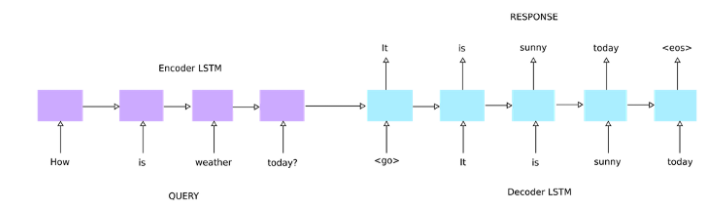

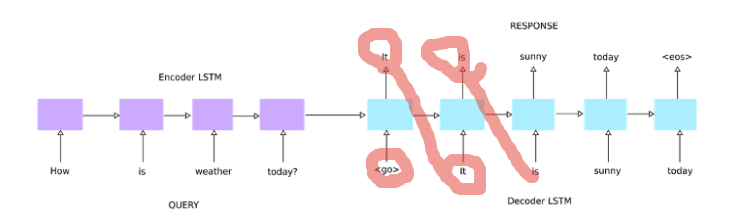

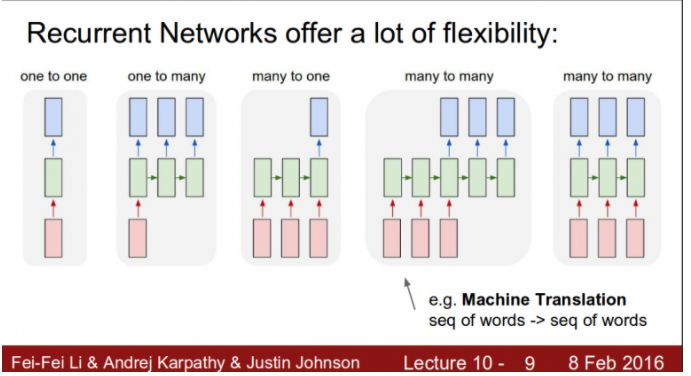

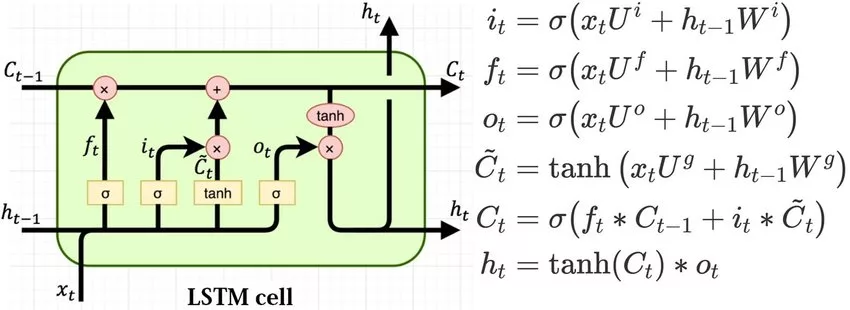

In [1]:
import pandas as pd

https://curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/ 

In [7]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import sys
sys.path.insert(1, './DL-anomaly-detection')



%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()





device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


In [12]:
data_path = './data/'

In [14]:
%%time
df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
df['Datetime'] = df['Date']+ ' ' + df['Time']
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(['Date','Time','Datetime'],1)

for col in df:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
df.head(3)
dff  = df.copy()

<string>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 2min 14s


In [15]:
df= dff[:1495]

In [16]:
import models, src, main,stastics,generate_residuals

# src = reload(src)
# models = reload(models)
# main = reload(main)
# generate_residuals = reload(generate_residuals)
# stastics = reload(stastics)

In [17]:
dfs = df.copy().iloc[:,0]
a = main.LSTM_forecaster()


Epoch: 01
	Train Loss: 0.527
	 Val. Loss: 0.414 
Epoch: 02
	Train Loss: 0.492
	 Val. Loss: 0.384 
Epoch: 03
	Train Loss: 0.461
	 Val. Loss: 0.358 
Epoch: 04
	Train Loss: 0.433
	 Val. Loss: 0.334 
Epoch: 05
	Train Loss: 0.407
	 Val. Loss: 0.312 
Epoch: 06
	Train Loss: 0.383
	 Val. Loss: 0.291 
Epoch: 07
	Train Loss: 0.360
	 Val. Loss: 0.269 
Epoch: 08
	Train Loss: 0.335
	 Val. Loss: 0.247 

Test Loss: 0.255


C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([296, 5, 1])) that is different to the input size (torch.Size([296, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


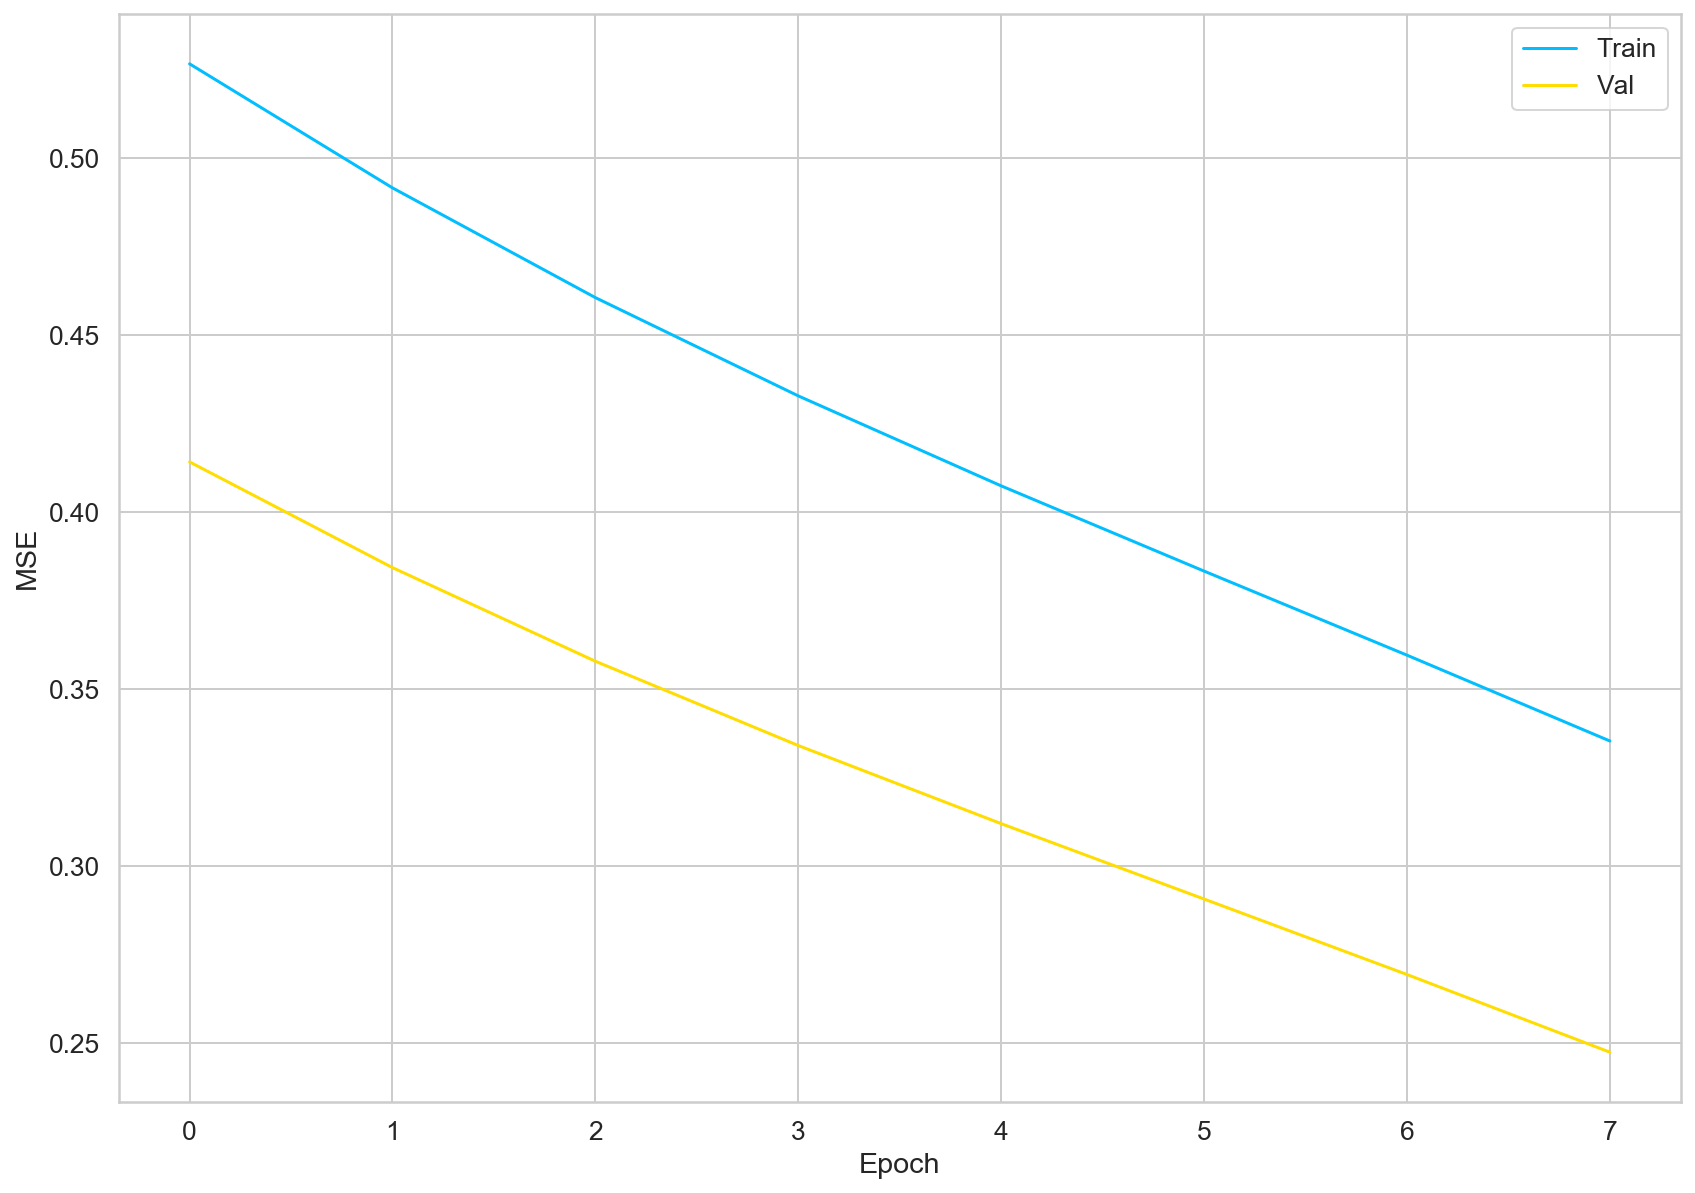

(1480, 10, 1)


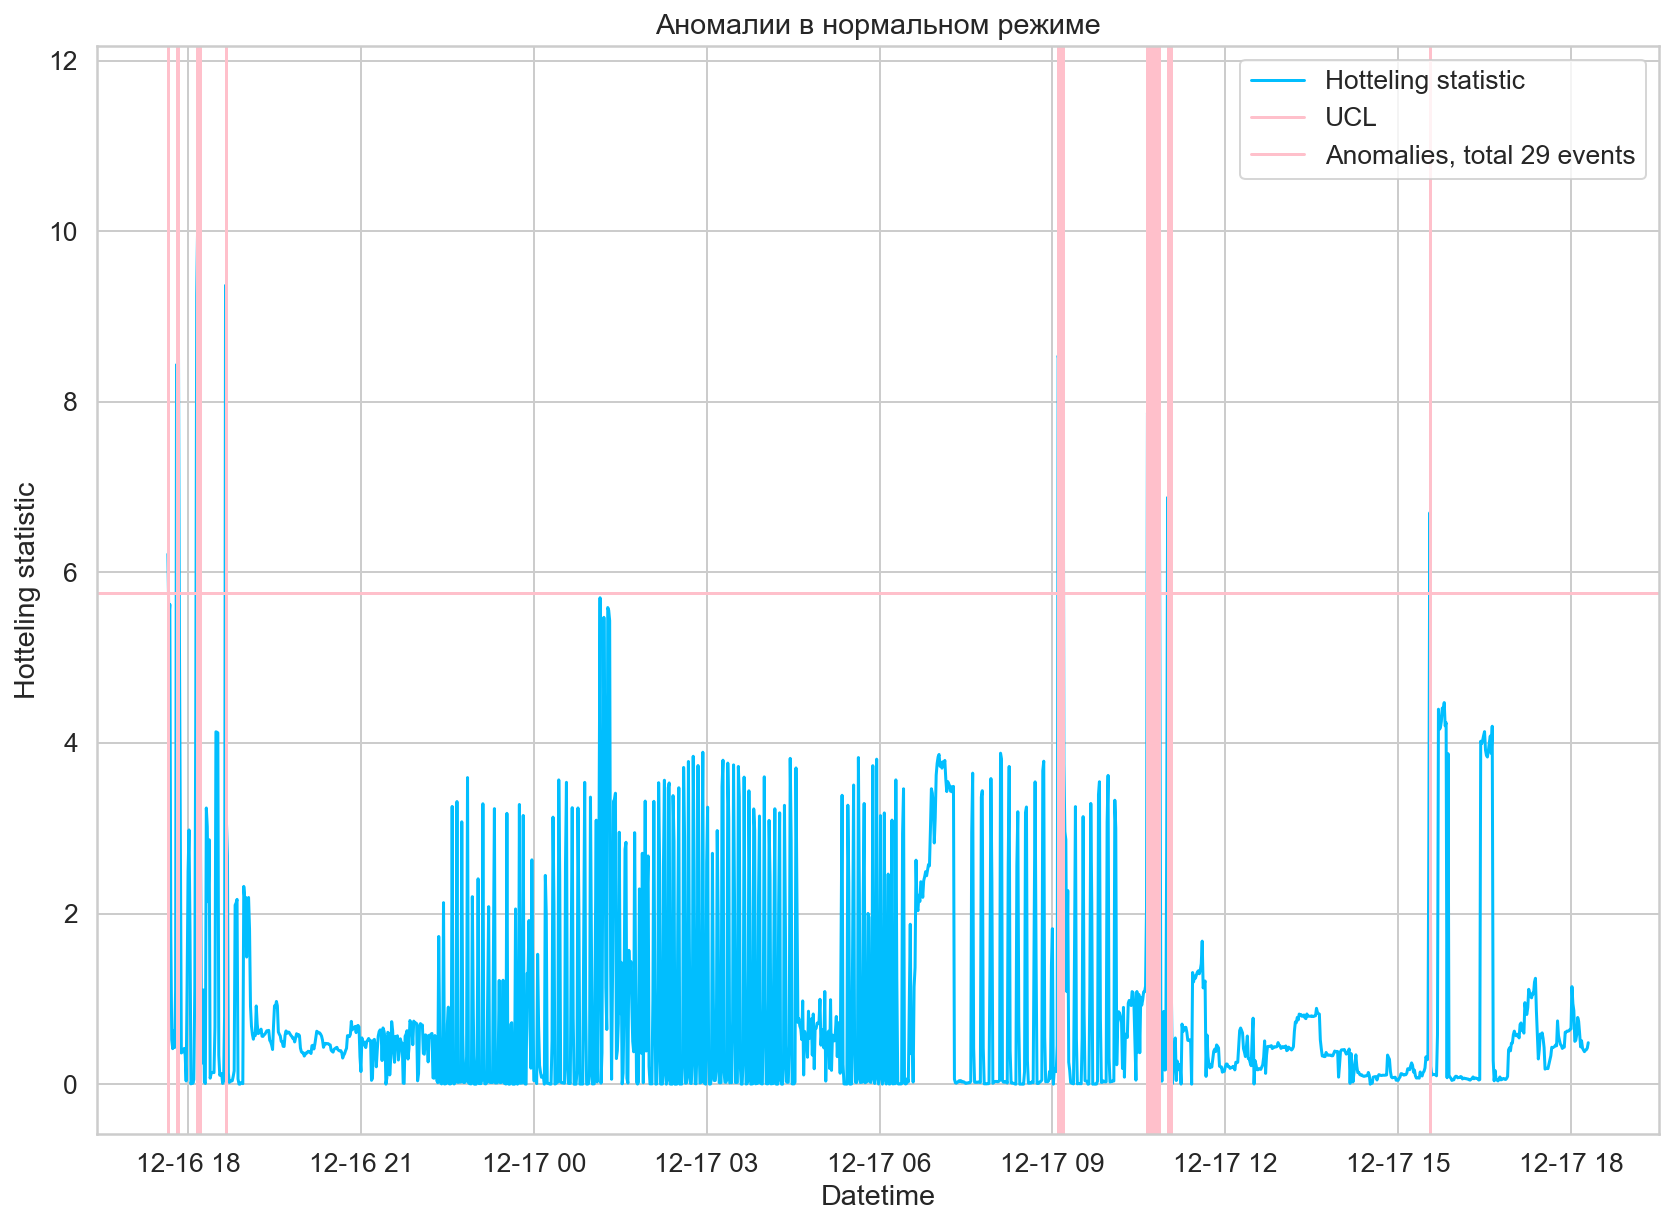

In [18]:
dfs = a.fit(dfs,n_epochs=8,
          generate_res_func = generate_residuals.generate_res_func,
          res_analys_alg=stastics.hotteling(),
           points_ahead=5)

(1484, 10, 1)


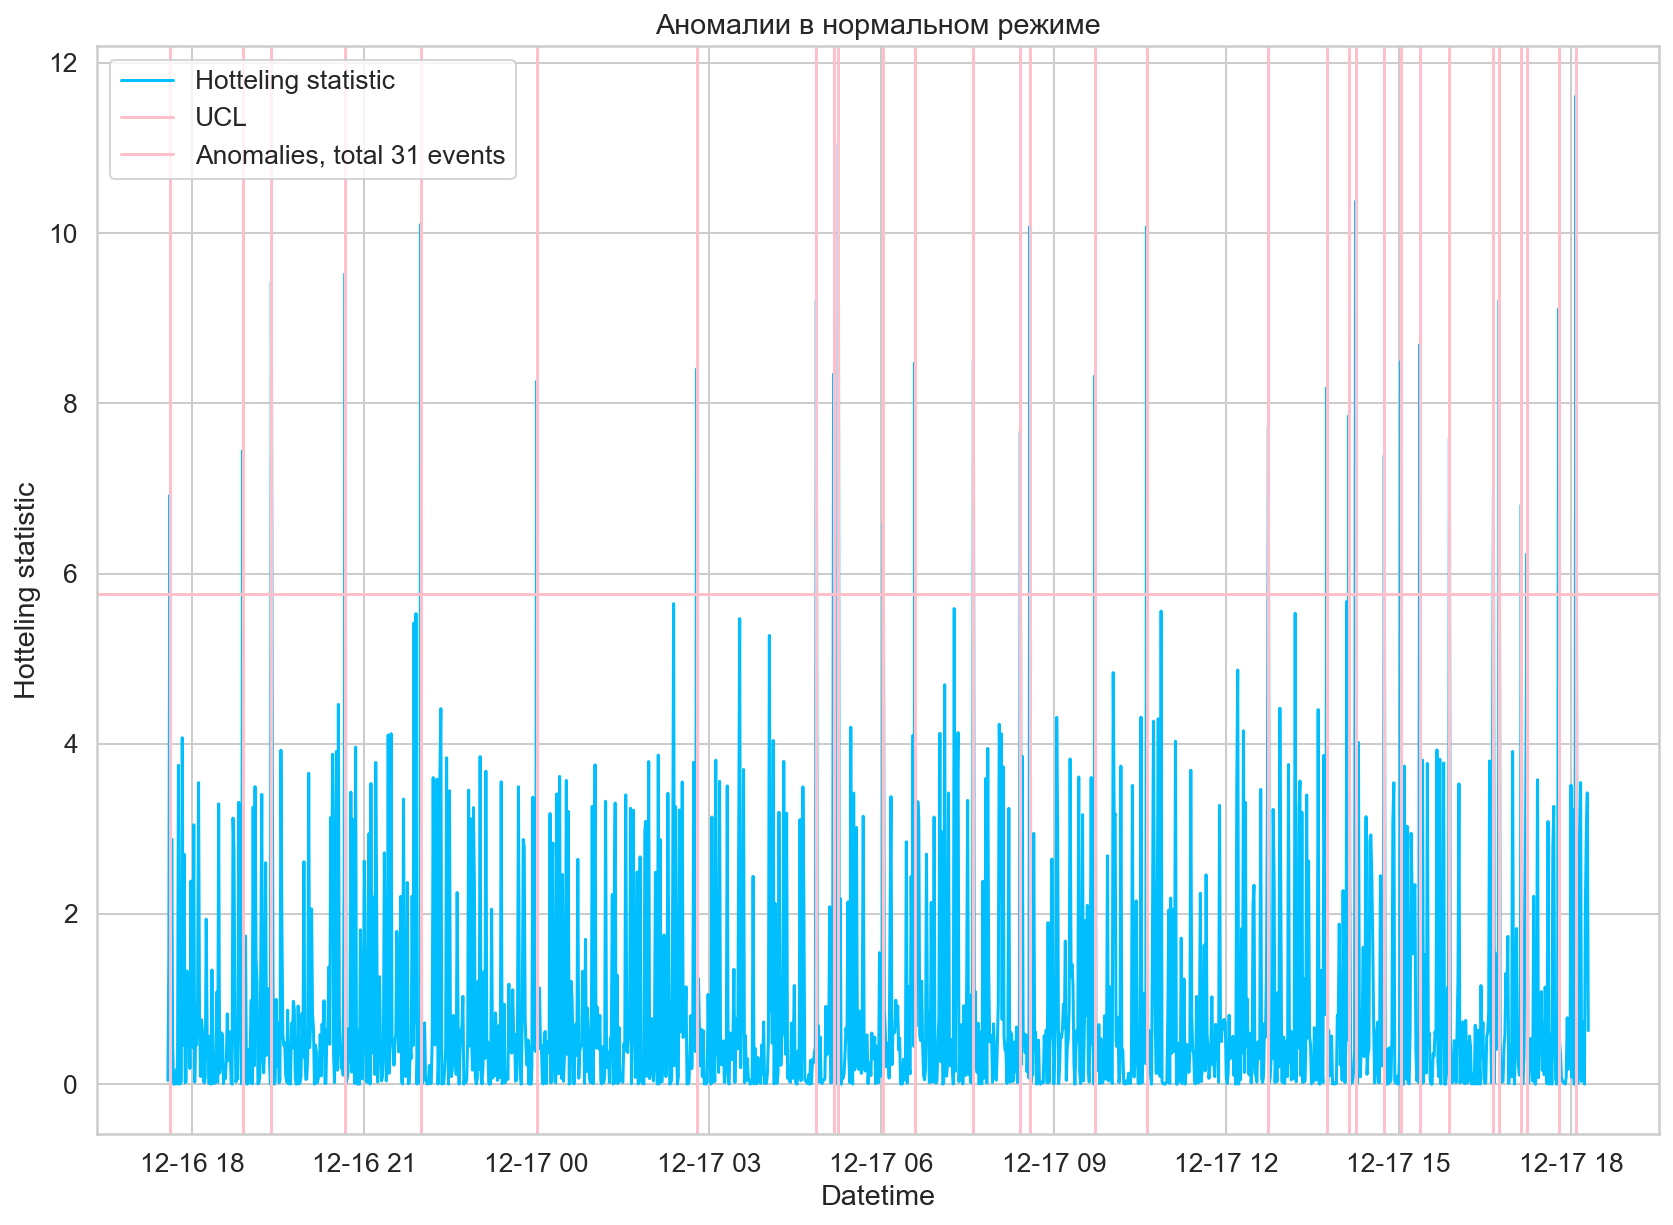

In [19]:
dfs = df.copy().iloc[:,0]

b= a.predict_anomaly(dfs)

(1495,)


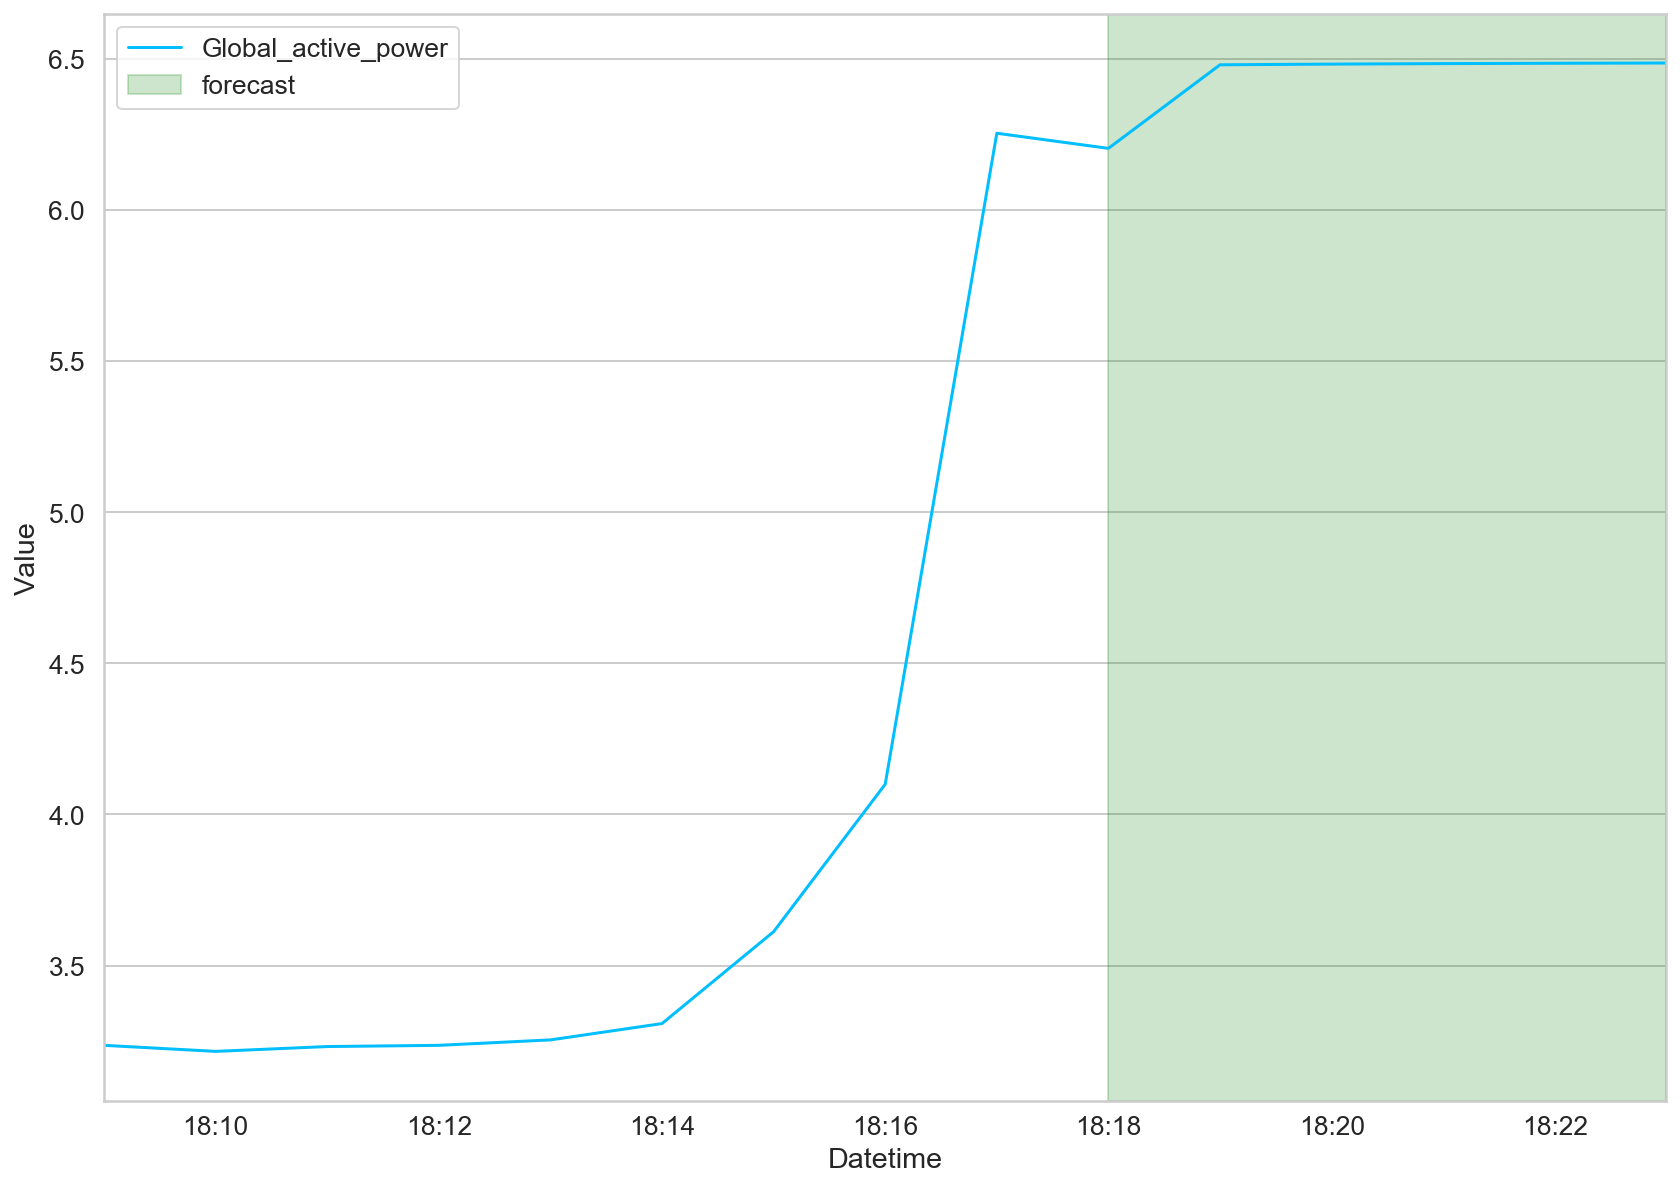

In [20]:
dfs = df.copy().iloc[:,0]

b= a.forecast(dfs)